In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [78]:
# Starting with loading our data and explore the features of the datasets. 

aisles = pd.read_csv("Data/aisles.csv")
products = pd.read_csv("Data/products.csv")
departments = pd.read_csv("Data/departments.csv")
order_products_prior = pd.read_csv("Data/order_products__prior.csv")
order_products_train = pd.read_csv("Data/order_products__train.csv")
orders = pd.read_csv("Data/orders.csv")


In [10]:
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [47]:
aisles.aisle.unique

<bound method Series.unique of 0           prepared soups salads
1               specialty cheeses
2             energy granola bars
3                   instant foods
4      marinades meat preparation
                  ...            
129      hot cereal pancake mixes
130                     dry pasta
131                        beauty
132    muscles joints pain relief
133    specialty wines champagnes
Name: aisle, Length: 134, dtype: object>

In [52]:
aisles.aisle.value_counts()

packaged poultry           1
pickled goods olives       1
canned meals beans         1
other creams cheeses       1
energy granola bars        1
                          ..
yogurt                     1
meat counter               1
fresh dips tapenades       1
baking supplies decor      1
breakfast bars pastries    1
Name: aisle, Length: 134, dtype: int64

In [45]:
print(departments.shape)
departments.head(21)

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [44]:
departments.department.unique

<bound method Series.unique of 0              frozen
1               other
2              bakery
3             produce
4             alcohol
5       international
6           beverages
7                pets
8     dry goods pasta
9                bulk
10      personal care
11       meat seafood
12             pantry
13          breakfast
14       canned goods
15         dairy eggs
16          household
17             babies
18             snacks
19               deli
20            missing
Name: department, dtype: object>

In [12]:
print(order_products_prior.shape)
order_products_prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [13]:
print(order_products_train.shape)
order_products_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [14]:
# The orders df has features describing day of week (order_dow) and what time of day (order_hour_of_day). 
# Will need to change dow's to the appropiate days. 
# The eval_set column does not seem to be relevant to my goals. Can drop that column. 

print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [79]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [15]:
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## Check For Missing Values

In [22]:
aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [23]:
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [24]:
departments.isna().sum()

department_id    0
department       0
dtype: int64

In [25]:
order_products_prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [26]:
order_products_train.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [27]:
orders.isna().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

### The only missing values are in the orders dataframe in the days_since_prior_order column. This is reasonable because it is possible that a customer may use Instacart's services only once. 

In [29]:
# 30.0 is the largest value count so the missing values must have been days valued over 30 days

orders.days_since_prior_order.value_counts()

30.0    369323
7.0     320608
6.0     240013
4.0     221696
3.0     217005
5.0     214503
2.0     193206
8.0     181717
1.0     145247
9.0     118188
14.0    100230
10.0     95186
13.0     83214
11.0     80970
12.0     76146
0.0      67755
15.0     66579
16.0     46941
21.0     45470
17.0     39245
20.0     38527
18.0     35881
19.0     34384
22.0     32012
28.0     26777
23.0     23885
27.0     22013
24.0     20712
25.0     19234
29.0     19191
26.0     19016
Name: days_since_prior_order, dtype: int64

## Analyzing the Dataframes

### Products - Exploration and Analysis

In [34]:
# We see that their are 49,688 unique, different products and
# that there 21 different department_id's and 134 different aisle_id's 
print(products.shape)
print(products.department_id.nunique())
print(products.aisle_id.nunique())

(49688, 4)
21
134


In [46]:
# It would be useful to merge the products dataframe with the aisle and department dataframe for gaining insight 
# on how many products are in a specific department and aisle. 
# merge using 'aisle_id' and 'department_id'

products_departments = pd.merge(products, departments, on = 'department_id', how = 'left')
products_details = pd.merge(products_departments, aisles, on = 'aisle_id', how = 'left')
products_details.head(7)

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation
5,6,Dry Nose Oil,11,11,personal care,cold flu allergy
6,7,Pure Coconut Water With Orange,98,7,beverages,juice nectars


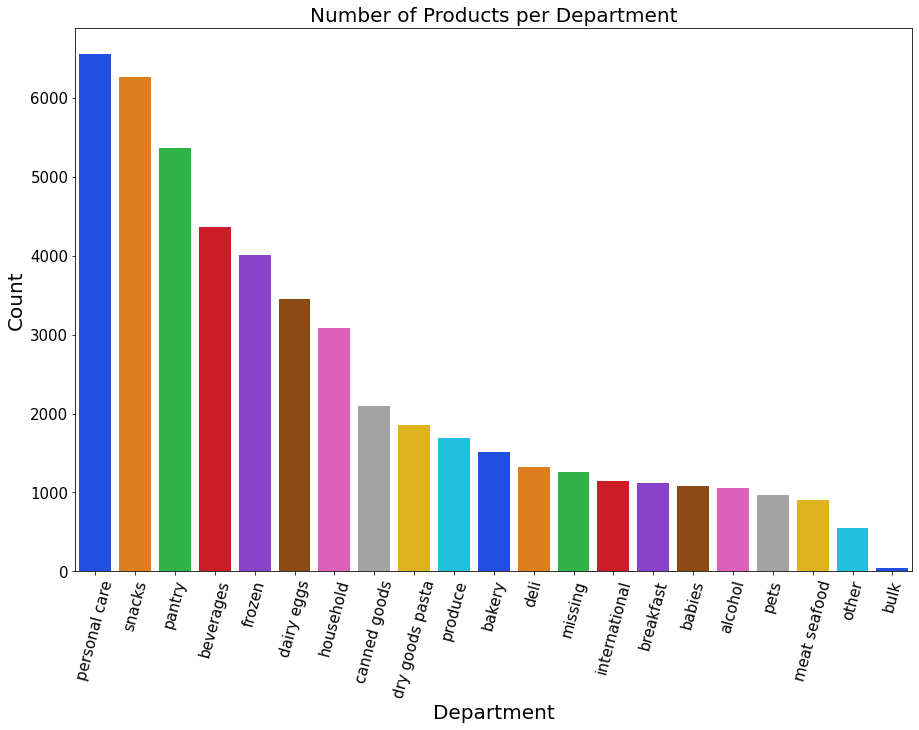

In [63]:
plt.figure(figsize = (15,10))
sns.countplot(x='department', data= products_details, order = products_details.department.value_counts().index,
              palette = "bright")
plt.title('Number of Products per Department', fontsize = 20)
plt.xticks(rotation=75, fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Department', fontsize = 20)
plt.savefig('Images/products_by_department.png');

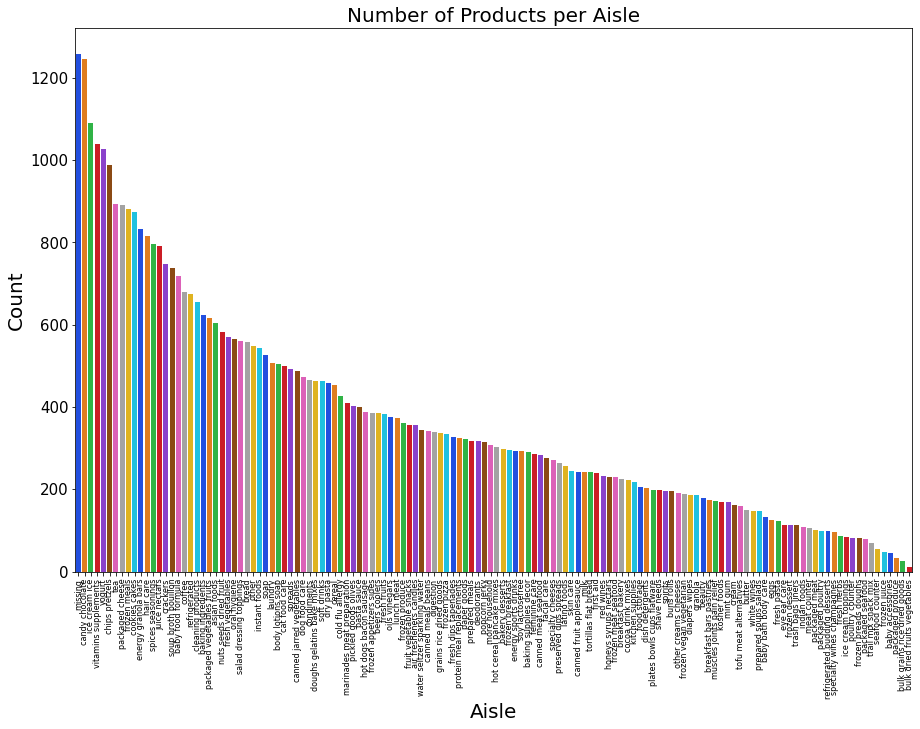

In [74]:
plt.figure(figsize = (15,10))
sns.countplot(x='aisle', data= products_details, order = products_details.aisle.value_counts().index, palette = 'bright')
plt.title('Number of Products per Aisle', fontsize = 20)
plt.xticks(rotation=90, fontsize = 8)
plt.yticks(fontsize = 15)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Aisle', fontsize = 20)
plt.savefig('Images/products_by_aisle.png');

# There is a "missing" department between the deli and international on the visual above. 


In [ ]:
# The first aisle, 'missing', has the most counts, and I see there is a 'missing' value for department above as well

In [67]:
# Aisle 100 and Department 21 has 1258 products "missing"

products_details[products_details['aisle']=='missing']

,product_id,product_name,aisle_id,department_id,department,aisle
37,38,Ultra Antibacterial Dish Liquid,100,21,missing,missing
71,72,Organic Honeycrisp Apples,100,21,missing,missing
109,110,Uncured Turkey Bologna,100,21,missing,missing
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing,missing
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21,missing,missing
49574,49575,Chocolate Vanilla Malt Custard,100,21,missing,missing
49640,49641,"8\"" Pecan Pie",100,21,missing,missing
49663,49664,Lemon Cayenne Drinking Vinegar,100,21,missing,missing


In [68]:
# This shows that a specific aisle_id corresponds to a specfic department_id. 
# This example of aisle_id of 15 with the "meat seafood" department
products_details[products_details['aisle_id']==15]

,product_id,product_name,aisle_id,department_id,department,aisle
560,561,Smoke Roasted Wild Sockeye Asian Sesame Salmon,15,12,meat seafood,packaged seafood
664,665,Imitation Crabmeat,15,12,meat seafood,packaged seafood
940,941,Smoked Atlantic Nova Salmon,15,12,meat seafood,packaged seafood
2820,2821,Tuna Steaks,15,12,meat seafood,packaged seafood
3160,3161,Flake Style Imitation Crab,15,12,meat seafood,packaged seafood
...,...,...,...,...,...,...
47379,47380,New York Style Nova Lox,15,12,meat seafood,packaged seafood
47877,47878,Imitation Crab Legs,15,12,meat seafood,packaged seafood
48359,48360,Raw Shrimp 41-50,15,12,meat seafood,packaged seafood
48828,48829,Smoke Roasted Wild Sockeye Salmon Apple Brown ...,15,12,meat seafood,packaged seafood


In [69]:
# many relationship between department and aisle
# The example of the produce department (id=4) shows that it can be found in a variety of different aisles. 
# fresh(id=83) or packaged(id=123) aisles
products_details[products_details['department']=='produce']

,product_id,product_name,aisle_id,department_id,department,aisle
30,31,White Pearl Onions,123,4,produce,packaged vegetables fruits
42,43,Organic Clementines,123,4,produce,packaged vegetables fruits
44,45,European Cucumber,83,4,produce,fresh vegetables
65,66,European Style Spring Mix,123,4,produce,packaged vegetables fruits
88,89,Yogurt Fruit Dip Sliced Apples,123,4,produce,packaged vegetables fruits
...,...,...,...,...,...,...
49577,49578,Black Garlic Bulbs,123,4,produce,packaged vegetables fruits
49618,49619,Opo Squash,83,4,produce,fresh vegetables
49634,49635,"Baby Food Blueberry, Parsnip & Buckwheat Stage 2",83,4,produce,fresh vegetables
49656,49657,Cabernet Tomatoes,83,4,produce,fresh vegetables


### Orders - Exploration and Analysis

In [73]:
# We see that their are 3,421,083 unique, different orders, starting from order_id 1 to 3,421,083
print(orders.shape)
print(orders.order_id.min())
print(orders.order_id.max())

(3421083, 6)
1
3421083


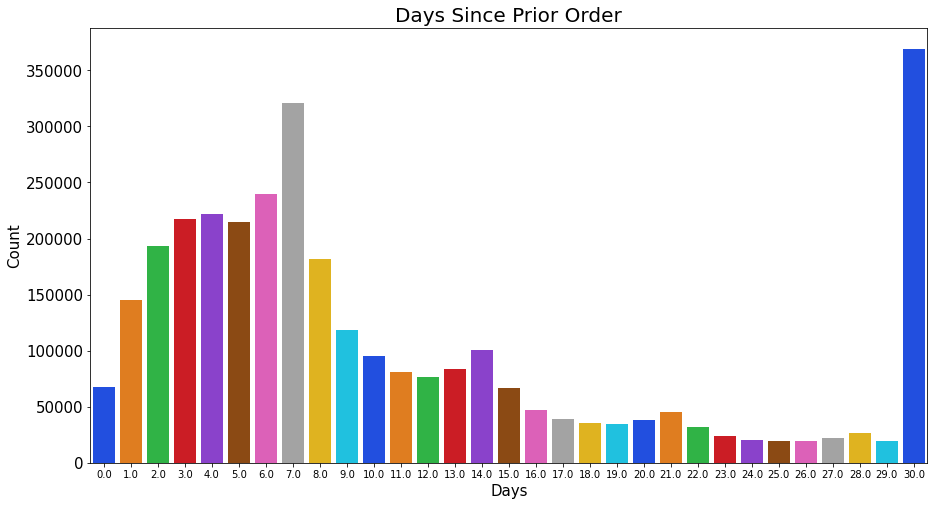

In [77]:
plt.figure(figsize = (15,8))
sns.countplot(x='days_since_prior_order', data= orders, palette = 'bright')
plt.title('Days Since Prior Order', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('Images/days_since_order.png');
# 30.0 days counts supports my belief that it also accounted for more than 30 days since reordering
# Noticeable to see customers that reorder every week on the same day at 7.0, every other week on the same day on 14.0,
# every 3 weeks on the same day at 21.0, and every 4 weeks on the same day at 28.0. 
# Same day multiple orders at 0.0 and many customers order more than once a week

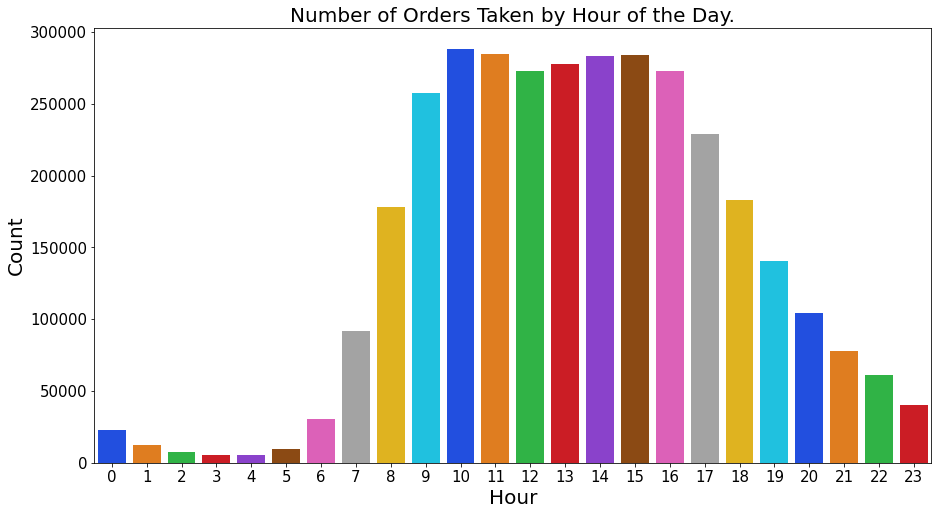

In [81]:
plt.figure(figsize = (15,8))
sns.countplot(x='order_hour_of_day', data= orders, palette = 'bright')
plt.title('Number of Orders Taken by Hour of the Day.', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Hour', fontsize = 20)
plt.savefig('Images/orders_by_hour.png');
# The peak hours appear to be 9am - 4pm

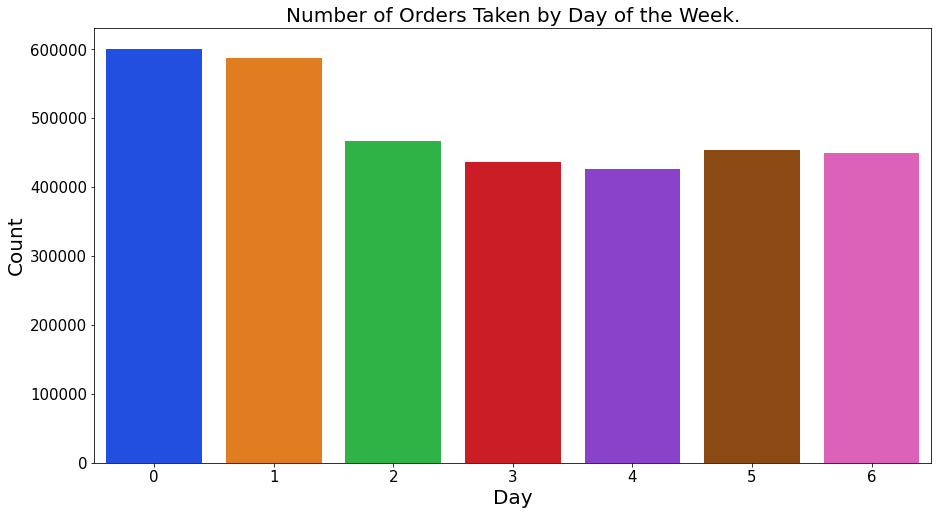

In [84]:
plt.figure(figsize = (15,8))
sns.countplot(x='order_dow', data= orders, palette = 'bright')
plt.title('Number of Orders Taken by Day of the Week.', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Day', fontsize = 20)
plt.savefig('Images/orders_by_dow.png');
# Sunday and Monday are the busiest days

In [87]:
# The orders dataframe appears to filter with user_id first, and then it organized with order_number. 
# We can see some NaN values in days_since_prior_order
# Most recent order_number per user_id is in the train eval_set, others are in prior

orders.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [88]:
# The order_id's begin at the value 1

orders.order_id.min()

1

In [90]:
# 131,209 orders in our train set

orders_train = orders[orders['eval_set']=='train']

orders_train

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0
...,...,...,...,...,...,...,...
3420838,2585586,206199,train,20,2,16,30.0
3420862,943915,206200,train,24,6,19,6.0
3420924,2371631,206203,train,6,4,19,30.0
3420933,1716008,206205,train,4,1,16,10.0


In [89]:
# 75,000 orders in our test set. 
# Train Test split ratio about 64:36

orders_test = orders[orders['eval_set']=='test'] 
orders_test
# I do not know what products were ordered in the test sets. 
# market basket analysis will help predict

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0
...,...,...,...,...,...,...,...
3420918,2728930,206202,test,23,2,17,6.0
3420929,350108,206204,test,5,4,14,14.0
3421001,1043943,206206,test,68,0,20,0.0
3421018,2821651,206207,test,17,2,13,14.0


### order_product Prior and Train - Exploration and Analysis